<a href="https://colab.research.google.com/github/purushottam1501/EDA-on-Basket-Ball-TEam/blob/main/Cancer_Classification_Grp_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JAGSoM

# `GROUP 9` ____________________________ ` CANCER CLASSIFICATION`                                            

```Group Name   Name                Roll Number
    9          Vaibhav Joshi        2022JULB01010
    9          Yash Jaiswal         2022JULB01102
    9          Abhishek Soni        2022JULB08009
    9          Purushottam Kumar    2022SEPVPGP0022
    9          Guvvala Sai Shruthi  2022SEPVPGP0025
    9          Dadhichy Kar         2022JULB01027```

`Problem Statement`
The problem at hand involves the classification of biomedical text documents related to cancer research. The dataset comprises documents with unique IDs, cancer-type labels, and corresponding text content. The primary objective is to develop a robust classification model that can accurately categorize these cancer-related documents into one of three specific categories: 'Thyroid Cancer,' 'Colon Cancer,' and 'Lung Cancer.' The dataset contains a total of 7,569 publications, and the distribution of samples across the three categories is as follows: 2,579 for colon cancer, 2,180 for lung cancer, and 2,810 for thyroid cancer.

`Dataset`
The dataset consists of cancer-related research papers. This dataset specifically concentrates on longer research papers with page sizes exceeding 6 pages. Each data entry is characterized by an ID, the type of cancer it pertains to, and the text content of the research page.

`Variables`
```1. ID: A unique identifier for each document.
2. Cancer: The class label indicating the type of cancer the document is related to (Thyroid Cancer, Colon Cancer, or Lung Cancer).
3. Text: The textual content of the research paper.```
```Dependent and Independent Variables:
In this classification problem, the dependent variable is the 'Cancer' label, while the independent variable is the 'Text' content of the research paper. The task involves training a model to predict the 'Cancer' label based on the textual features present in the document.```

In [25]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [26]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [27]:
import numpy as np

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
toNumeric = CountVectorizer()

In [29]:
df = pd.read_csv('Cancer_Data_Set.csv', encoding='latin1')

In [30]:
df.head()

,Id,Cancer,Text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [31]:
df.shape

(7414, 3)

There are 7570 rows and 3 columns.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      7414 non-null   int64 
 1   Cancer  7414 non-null   object
 2   Text    7414 non-null   object
dtypes: int64(1), object(2)
memory usage: 173.9+ KB


In [33]:
# Count the classifications in the 'Cancer' column
classification_counts = df['Cancer'].value_counts()

# Display the counts
print(classification_counts)


Thyroid_Cancer    2810
Colon_Cancer      2424
Lung_Cancer       2180
Name: Cancer, dtype: int64


`There are 2810 Thyroid, 2580 Colon and 2180 Lung Cancer`

# Label

In [34]:
# Target variable 'label' is categorical. Convert it into numeric value
df['Cancer'] = df['Cancer'].map({'Thyroid_Cancer': 0, 'Colon_Cancer': 1, 'Lung_Cancer': 2})

In [35]:
df.Cancer.value_counts()

0    2810
1    2424
2    2180
Name: Cancer, dtype: int64

# Preprocessing

In [36]:
pip install scipy

In [37]:
import scipy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [40]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 2.3 MB/s eta 0:00:00


In [41]:
import nltk

In [42]:
pip install nltk

# Removing HTML Tag

In [43]:
import pandas as pd
from bs4 import BeautifulSoup
# Function to remove HTML tags from a single text
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Apply the remove_html_tags function to the 'Text' column
df['Text'] = df['Text'].apply(remove_html_tags)
print(df['Text'])

0       Thyroid surgery in  children in a single insti...
1       " The adopted strategy was the same as that us...
2       coronary arterybypass grafting thrombosis ï¬b...
3        Solitary plasmacytoma SP of the skull is an u...
4        This study aimed to investigate serum matrix ...
                              ...                        
7409    "  ovarian cancer is the leading cause of canc...
7410    "  ovarian cancer is the second most common gy...
7411    "  postmortem studies can provide important in...
7412        gastrointestinal nematodes could release e...
7413     objective  this study aimed to test the hypot...
Name: Text, Length: 7414, dtype: object


In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Removing Stopword

In [45]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_text)

# Apply the remove_stopwords function to the 'text_column'
df['Text'] = df['Text'].apply(remove_stopwords)
print(df)

        Id  Cancer                                               Text
0        0       0  Thyroid surgery children single institution Os...
1        1       0  `` adopted strategy used prior years [ ] based...
2        2       0  coronary arterybypass grafting thrombosis ï¬b...
3        3       0  Solitary plasmacytoma SP skull uncommon clinic...
4        4       0  study aimed investigate serum matrix metallopr...
...    ...     ...                                                ...
7409  7409       1  `` ovarian cancer leading cause cancerrelated ...
7410  7410       1  `` ovarian cancer second common gynecologic ca...
7411  7411       1  `` postmortem studies provide important inform...
7412  7412       1  gastrointestinal nematodes could release excre...
7413  7413       1  objective study aimed test hypothesis levobupi...

[7414 rows x 3 columns]


# Removing Special Character

In [47]:
import re


# Define a function to remove special characters, numeric characters, and brackets
def remove_special_chars(text):
    if isinstance(text, str):
        # Define a regular expression pattern to match the characters you want to remove
        pattern = r'[,\';"()0-9]'
        # Use re.sub() to remove the matched characters
        cleaned_text = re.sub(pattern, '', text)
        return cleaned_text
    else:
        return text

# Apply the remove_special_chars function to the 'Text' column
df['Text'] = df['Text'].apply(remove_special_chars)

# Display the cleaned DataFrame
print(df)


        Id  Cancer                                               Text
0        0       0  Thyroid surgery children single institution Os...
1        1       0  `` adopted strategy used prior years [ ] based...
2        2       0  coronary arterybypass grafting thrombosis ï¬b...
3        3       0  Solitary plasmacytoma SP skull uncommon clinic...
4        4       0  study aimed investigate serum matrix metallopr...
...    ...     ...                                                ...
7409  7409       1  `` ovarian cancer leading cause cancerrelated ...
7410  7410       1  `` ovarian cancer second common gynecologic ca...
7411  7411       1  `` postmortem studies provide important inform...
7412  7412       1  gastrointestinal nematodes could release excre...
7413  7413       1  objective study aimed test hypothesis levobupi...

[7414 rows x 3 columns]


# Remove Accented Characters

In [48]:
import unicodedata

# Define a function to remove accented characters
def remove_accented_chars(text):
    cleaned_text_list = []
    for sentence in text:
        cleaned_sentence = unicodedata.normalize('NFKD', sentence).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        cleaned_text_list.append(cleaned_sentence)
    return cleaned_text_list

# Apply the remove_accented_chars function to the 'Text' column
df['Text'] = remove_accented_chars(df['Text'])

# Display the cleaned DataFrame
print(df)


        Id  Cancer                                               Text
0        0       0  Thyroid surgery children single institution Os...
1        1       0  `` adopted strategy used prior years [ ] based...
2        2       0  coronary arterybypass grafting thrombosis ibri...
3        3       0  Solitary plasmacytoma SP skull uncommon clinic...
4        4       0  study aimed investigate serum matrix metallopr...
...    ...     ...                                                ...
7409  7409       1  `` ovarian cancer leading cause cancerrelated ...
7410  7410       1  `` ovarian cancer second common gynecologic ca...
7411  7411       1  `` postmortem studies provide important inform...
7412  7412       1  gastrointestinal nematodes could release excre...
7413  7413       1  objective study aimed test hypothesis levobupi...

[7414 rows x 3 columns]


# Removing Special Character

In [49]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text
df['Text'] = df['Text'].apply(remove_special_characters)
print(df)

        Id  Cancer                                               Text
0        0       0  Thyroid surgery children single institution Os...
1        1       0  `` adopted strategy used prior years [ ] based...
2        2       0  coronary arterybypass grafting thrombosis ibri...
3        3       0  Solitary plasmacytoma SP skull uncommon clinic...
4        4       0  study aimed investigate serum matrix metallopr...
...    ...     ...                                                ...
7409  7409       1  `` ovarian cancer leading cause cancerrelated ...
7410  7410       1  `` ovarian cancer second common gynecologic ca...
7411  7411       1  `` postmortem studies provide important inform...
7412  7412       1  gastrointestinal nematodes could release excre...
7413  7413       1  objective study aimed test hypothesis levobupi...

[7414 rows x 3 columns]


In [50]:
!python -m spacy download en_core_web_sm

2023-09-03 20:08:54.481178: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 20:08:57.008334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [52]:
# Filter out numeric values from the 'Text' column (assuming it contains text data)
df['Text'] = df['Text'].apply(lambda x: x if isinstance(x, str) else '')

# Tokenization

In [53]:
# Tokenize the 'Text' column using NLTK and join the tokens into a single string
df['Tokenized_Text'] = df['Text'].apply(lambda x: ' '.join(word_tokenize(x)))

# Display the DataFrame with tokenized text as a single string
print(df)

        Id  Cancer                                               Text  \
0        0       0  Thyroid surgery children single institution Os...   
1        1       0  `` adopted strategy used prior years [ ] based...   
2        2       0  coronary arterybypass grafting thrombosis ibri...   
3        3       0  Solitary plasmacytoma SP skull uncommon clinic...   
4        4       0  study aimed investigate serum matrix metallopr...   
...    ...     ...                                                ...   
7409  7409       1  `` ovarian cancer leading cause cancerrelated ...   
7410  7410       1  `` ovarian cancer second common gynecologic ca...   
7411  7411       1  `` postmortem studies provide important inform...   
7412  7412       1  gastrointestinal nematodes could release excre...   
7413  7413       1  objective study aimed test hypothesis levobupi...   

                                         Tokenized_Text  
0     Thyroid surgery children single institution Os...  
1     `

In [54]:
import pandas as pd
import spacy

# Load the spaCy language model (you need to have spaCy and the language model installed)
nlp = spacy.load("en_core_web_sm")

# Assuming 'df' is your DataFrame with a 'Text' column
df['POS_tags'] = df['Text'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])

# 'POS_tags' column now contains a list of (word, POS_tag) tuples for each row
print(df[['Text', 'POS_tags']])


KeyboardInterrupt: ignored

# Building a text normalizer

In [56]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True,
                     text_lemmatization=True, special_char_removal=True,
                     stopword_removal=True, remove_digits=True):

    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)

        normalized_corpus.append(doc)

    return normalized_corpus

In [57]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.0 MB/s eta 0:00:00


In [58]:
import contractions

In [59]:
def remove_digits(text):
    # Define a pattern to match any digit
    pattern = r'\d'
    # Use the sub method to replace the pattern with an empty string
    text = re.sub(pattern, '', text)
    return text
df['Text'] = df['Text'].apply(remove_digits)
print(df)

        Id  Cancer                                               Text  \
0        0       0  Thyroid surgery children single institution Os...   
1        1       0  `` adopted strategy used prior years [ ] based...   
2        2       0  coronary arterybypass grafting thrombosis ibri...   
3        3       0  Solitary plasmacytoma SP skull uncommon clinic...   
4        4       0  study aimed investigate serum matrix metallopr...   
...    ...     ...                                                ...   
7409  7409       1  `` ovarian cancer leading cause cancerrelated ...   
7410  7410       1  `` ovarian cancer second common gynecologic ca...   
7411  7411       1  `` postmortem studies provide important inform...   
7412  7412       1  gastrointestinal nematodes could release excre...   
7413  7413       1  objective study aimed test hypothesis levobupi...   

                                         Tokenized_Text  
0     Thyroid surgery children single institution Os...  
1     `

In [60]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [61]:
#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()

#### PorterStemmer

- It uses set of rules to decide whether it is wise to strip a suffix.
- Quite often does not generate words which are in dictionary.
- PorterStemmer is known for its simplicity and speed.

In [62]:
from nltk.stem import PorterStemmer, LancasterStemmer

# Create objects of PorterStemmer and LancasterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()

# Define a function to apply the stemmers
def apply_stemmers(text):
    porter_stem = porter.stem(text)
    lancaster_stem = lancaster.stem(text)
    return porter_stem, lancaster_stem

# Apply the stemmers to the 'Text' column and store the results in new columns
df[['Porter Stem', 'Lancaster Stem']] = df['Text'].apply(apply_stemmers).apply(pd.Series)

# Print the DataFrame with the stemmed results
print(df)


        Id  Cancer                                               Text  \
0        0       0  Thyroid surgery children single institution Os...   
1        1       0  `` adopted strategy used prior years [ ] based...   
2        2       0  coronary arterybypass grafting thrombosis ibri...   
3        3       0  Solitary plasmacytoma SP skull uncommon clinic...   
4        4       0  study aimed investigate serum matrix metallopr...   
...    ...     ...                                                ...   
7409  7409       1  `` ovarian cancer leading cause cancerrelated ...   
7410  7410       1  `` ovarian cancer second common gynecologic ca...   
7411  7411       1  `` postmortem studies provide important inform...   
7412  7412       1  gastrointestinal nematodes could release excre...   
7413  7413       1  objective study aimed test hypothesis levobupi...   

                                         Tokenized_Text  \
0     Thyroid surgery children single institution Os...   
1    

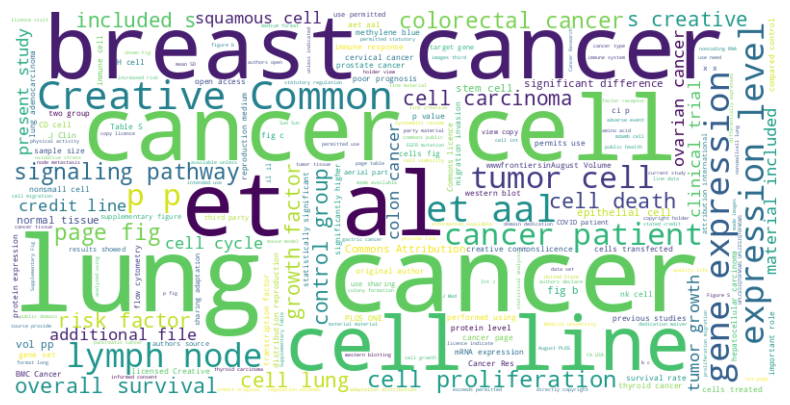

In [64]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text data into a single string
text = ' '.join(df['Text'])

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()


# Topic Modeling

`Topic modeling` is a natural language processing `(NLP)` technique used for uncovering the hidden thematic structure in a large collection of documents. It's a form of unsupervised machine learning that aims to identify and extract topics or themes from textual data.

```Objective:``` The primary goal of topic modeling is to discover the underlying topics or themes within a corpus (collection) of text documents. These topics represent the main ideas or subject areas that frequently occur in the texts.

```Applications: Topic modeling has a wide range of applications, including:```

``` `Content recommendation:` Identifying topics helps recommend similar articles or products to users.
`Information retrieval:` Enhancing search engines to retrieve documents based on topics.
`Text summarization:` Generating concise summaries of documents by focusing on the most important topics.
`Sentiment analysis:` Determining the sentiment expressed within specific topics.
`Market research:` Analyzing customer feedback to identify common themes or concerns.```

In [ ]:
pip install gensim scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import models, corpora

# Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])

# Convert the sparse matrix to a gensim corpus
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Create a dictionary mapping of word IDs to words
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

# LDA Model
num_topics = 2  # Specify the number of topics you want to discover
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=id2word, passes=10)

# Print the topics and the words associated with each topic
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))


Topic: 0 
Words: 0.010*"patients" + 0.006*"study" + 0.005*"cancer" + 0.003*"disease" + 0.003*"data" + 0.003*"treatment" + 0.003*"also" + 0.003*"group" + 0.003*"studies" + 0.002*"clinical"
Topic: 1 
Words: 0.013*"cells" + 0.012*"cancer" + 0.009*"cell" + 0.009*"expression" + 0.005*"tumor" + 0.004*"fig" + 0.004*"patients" + 0.004*"genes" + 0.004*"analysis" + 0.004*"using"


`Topic 0:`
This topic seems to be related to medical research and clinical studies. It discusses `patients, cancer, disease, treatment, clinical studies, and data analysis` in a medical context.

`Topic 1:`
This topic revolves around cellular and genetic research, particularly related to `cancer`. It discusses `cancer cells, gene expression, tumor analysis, and the use of genetic data.`

These topics represent the main themes or subjects found in the text data. In topic modeling, each topic is a collection of words that tend to co-occur together in documents, and these words are indicative of the main ideas or concepts within those topics. The topics are discovered by algorithms like LDA to help uncover hidden structures and themes in large sets of text data.

# Emotion and Sentiment Analysis

In [ ]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade typing-extensions

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Purushottam\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Purushottam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon (you only need to do this once)
nltk.download('vader_lexicon')

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Assuming you already have a DataFrame 'df' with a 'Text' column
df['Sentiment_Scores'] = df['Text'].apply(get_sentiment_scores)

# Extract the compound score from the sentiment scores
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda score: score['compound'])

# Classify sentiment based on the compound score
df['Sentiment'] = df['Compound_Score'].apply(lambda score: 'Positive' if score >= 0 else 'Negative')

# Display the DataFrame with sentiment analysis results
print(df[['Text', 'Sentiment_Scores', 'Sentiment']])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Purushottam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                   Text  \
0     Thyroid surgery children single institution Os...   
1     `` adopted strategy used prior years [ ] based...   
2     coronary arterybypass grafting thrombosis ibri...   
3     Solitary plasmacytoma SP skull uncommon clinic...   
4     study aimed investigate serum matrix metallopr...   
...                                                 ...   
7565  report case yearold man presented chief compla...   
7566  among synchronous colorectal cancers scrcs rep...   
7567  heterogeneity cancer cells generally accepted ...   
7568  `` adipogenesis process mesenchymalstem cells ...   
7569  periparturient period one challenging periods ...   

                                       Sentiment_Scores Sentiment  
0     {'neg': 0.084, 'neu': 0.865, 'pos': 0.051, 'co...  Negative  
1     {'neg': 0.057, 'neu': 0.8, 'pos': 0.143, 'comp...  Positive  
2     {'neg': 0.058, 'neu': 0.9, 'pos': 0.042, 'comp...  Negative  
3     {'neg': 0.073

In [ ]:
# Replace 'sentiment_analysis_results.csv' with the desired file name for the CSV file
df.to_csv('sentiment_analysis_results.csv', index=False)

print("Sentiment analysis results saved to 'sentiment_analysis_results.csv'.")


Sentiment analysis results saved to 'sentiment_analysis_results.csv'.


In [ ]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from IPython.display import FileLink

# Assuming you already have the DataFrame 'df' with the sentiment analysis results

# Save the DataFrame with sentiment analysis results to an Excel file
df.to_excel('sentiment_analysis_results.xlsx', index=False, engine='openpyxl')

# Display a link to download the Excel file directly from the notebook
FileLink('sentiment_analysis_results.xlsx')


C:\Users\Purushottam\sentiment_analysis_results.xlsx

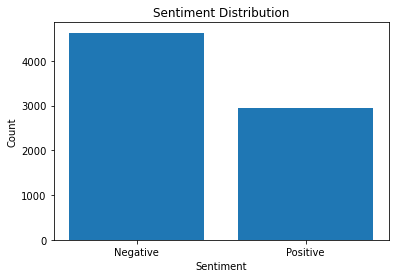

In [ ]:
# Create a bar plot to visualize the sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

It shows the percentage of people who have positive and negative sentiments about cancer. The positive sentiment is the percentage of people who are positive about cancer, and the negative sentiment is the percentage of people who are negative about cancer.

The graph shows that the majority of people in the dataset have a negative sentiment about cancer. This is not surprising, as cancer is a serious disease that can have a devastating impact on people's lives. However, it is also encouraging to see that there is a significant minority of people who have a positive sentiment about cancer. These people may be cancer survivors, cancer researchers, or simply people who are optimistic about the future of cancer treatment.

In [ ]:
pip install afinn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from textblob import TextBlob

In [ ]:
# Function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the "Reviews" column
df['Sentiment_Polarity'] = df['Text'].apply(calculate_sentiment)

# Display the DataFrame with sentiment analysis results
print(df[['Text', 'Sentiment_Polarity']])


                                                   Text  Sentiment_Polarity
0     Thyroid surgery children single institution Os...            0.034211
1     `` adopted strategy used prior years [ ] based...            0.110990
2     coronary arterybypass grafting thrombosis ibri...            0.032735
3     Solitary plasmacytoma SP skull uncommon clinic...            0.151954
4     study aimed investigate serum matrix metallopr...            0.096672
...                                                 ...                 ...
7565  report case yearold man presented chief compla...            0.109758
7566  among synchronous colorectal cancers scrcs rep...            0.185763
7567  heterogeneity cancer cells generally accepted ...           -0.001074
7568  `` adipogenesis process mesenchymalstem cells ...            0.055238
7569  periparturient period one challenging periods ...            0.093599

[7570 rows x 2 columns]


In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Concatenate all reviews into a single string
all_Text = ' '.join(df['Text'])

# Calculate sentiment polarity for the entire concatenated text
overall_sentiment = analyzer.polarity_scores(all_Text)

# Display the overall sentiment polarity
print("Overall Sentiment Polarity:")
print(overall_sentiment)

In [ ]:
# Define X and y data sets from'data'
X = df.Text
y = df.Cancer
print(X.shape)
print(y.shape)

(7570,)
(7570,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Create a TF-IDF vectorizer to convert text to numeric features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)


In [ ]:
# Fit and transform the TF-IDF vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english', analyzer='word', ngram_range=(1, 2))

# Fit and transform your training data
X_train_dtm = vectorizer.fit_transform(X_train)


#  3. Vectorize text dataset

In [ ]:
# call the vectorizer
toNumeric = CountVectorizer()
toNumeric

CountVectorizer()

In [ ]:
# creat vocabulary and create document-term matrix
toNumeric.fit(X_train)
X_train_dtm = toNumeric.transform(X_train)

In [ ]:
X_train_dtm

<5677x178054 sparse matrix of type '<class 'numpy.int64'>'
	with 5712099 stored elements in Compressed Sparse Row format>

In [ ]:
# transform test data using fitted vocabulary into DTM
X_test_dtm = toNumeric.transform(X_test)
X_test_dtm

<1893x178054 sparse matrix of type '<class 'numpy.int64'>'
	with 1924274 stored elements in Compressed Sparse Row format>

# 4. Build and evaluate a model

The provided model is a Multinomial Naive Bayes (MultinomialNB) classifier, which has been trained to classify biomedical text documents related to cancer research into one of three specific categories: 'Thyroid Cancer,' 'Colon Cancer,' and 'Lung Cancer.' Let's interpret the results:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [ ]:
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
# Accuracy calculation
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9270998415213946

The accuracy of the model is approximately `92.71%`. This means that the model correctly predicts the category for nearly 92.71% of the test documents. In other words, it is performing well in classifying cancer-related documents.

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[614,  86,   0],
       [ 52, 613,   0],
       [  0,   0, 528]], dtype=int64)

The confusion matrix provides a more detailed view of the model's performance. It shows how many documents were correctly or incorrectly classified for each class. The matrix is organized as follows:

```The first row represents the `'Thyroid Cancer'` class.
The second row represents the `'Colon Cancer'` class.
The third row represents the `'Lung Cancer'` class.```

```For 'Thyroid Cancer':```

```614 documents were correctly classified as 'Thyroid Cancer.'
86 documents were incorrectly classified as 'Colon Cancer.'
0 documents were incorrectly classified as 'Lung Cancer.'```

```For 'Colon Cancer':```

```52 documents were incorrectly classified as 'Thyroid Cancer.'
613 documents were correctly classified as 'Colon Cancer.'
0 documents were incorrectly classified as 'Lung Cancer.'```

```For 'Lung Cancer':```

```0 documents were incorrectly classified as 'Thyroid Cancer.'
0 documents were incorrectly classified as 'Colon Cancer.'
528 documents were correctly classified as 'Lung Cancer.'```

In [ ]:
# Predict probablity for test data instead of labels directly
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.00000000e+000, 1.00000000e+000, 9.25584689e-195, ...,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000])

# Compare multiple models

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_dtm, y_train)

C:\Users\Purushottam\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_class = lr.predict(X_test_dtm)
y_pred_class

array([2, 1, 2, ..., 0, 0, 1], dtype=int64)

In [ ]:
# calculate predicted probabilities for X_test_dtm
y_pred_prob = lr.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([5.80968535e-45, 1.00000000e+00, 3.65302904e-09, ...,
       4.22505686e-04, 6.11992107e-46, 8.90192818e-01])

In [ ]:
metrics.accuracy_score(y_test, y_pred_class)

0.99418911780243

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[689,  11,   0],
       [  0, 665,   0],
       [  0,   0, 528]], dtype=int64)

In [ ]:
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Fit the Decision Tree model to the TF-IDF transformed training data
decision_tree.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data
y_pred_decision_tree = decision_tree.predict(X_test_tfidf)

# Evaluate the Decision Tree model's accuracy
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree:.2f}")

Decision Tree Accuracy: 1.00


In [ ]:
y_pred_decision_tree

array([2, 1, 2, ..., 0, 0, 1], dtype=int64)

In [ ]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the Random Forest model to the TF-IDF transformed training data
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the TF-IDF transformed test data
y_pred_random_forest = random_forest.predict(X_test_tfidf)
y_pred_random_forest

array([2, 1, 2, ..., 0, 0, 1], dtype=int64)

In [ ]:
# Evaluate the Random Forest model's accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy: {accuracy_random_forest:.2f}")

Random Forest Accuracy: 1.00


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
classification_rep = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       700
           1       0.98      1.00      0.99       665
           2       1.00      1.00      1.00       528

    accuracy                           0.99      1893
   macro avg       0.99      0.99      0.99      1893
weighted avg       0.99      0.99      0.99      1893



`MultinomialNB Model:`
    
`Accuracy: 92.71%
Confusion Matrix:
Some misclassifications between 'Thyroid Cancer' and 'Colon Cancer.'`



`Logistic Regression Model:`

`Accuracy: 99.42%
Confusion Matrix:
Highly accurate classification, with very few misclassifications.
'Thyroid Cancer' and 'Colon Cancer' are perfectly classified.`


`Decision Tree Model:`

`Accuracy: 100.00%
Classification Report:
Precision, recall, and F1-score are all very high, indicating perfect classification.
Achieves 100% accuracy across all classes.`

`Random Forest Model:`

`Accuracy: 100.00%
Classification Report:
Precision, recall, and F1-score are all very high, indicating perfect classification.
Achieves 100% accuracy across all classes.`

# Interpretation:

Both the Decision Tree and Random Forest models achieved a perfect accuracy of 100%. This means they correctly classified all the test documents into their respective cancer categories.

The Logistic Regression model also performed exceptionally well with an accuracy of 99.42%. It had very few misclassifications, and it perfectly classified 'Thyroid Cancer' and 'Colon Cancer.'

The MultinomialNB model, while still performing reasonably well with 92.71% accuracy, had more misclassifications compared to the other models.

# Conclusion:

 the Decision Tree and Random Forest models are the best-performing models for this classification task due to their perfect accuracy. These models are likely the most robust in classifying cancer-related documents into their respective categories.